# Features affecting the bike duration

## Investigation Overview

In this investigation, I wanted to look at the characteristics of rides that could be used to increase the profit of the company. The main focus was on the duration of the ride, distance travelled, day of the ride, hour of the ride, age, user type.



## Dataset Overview

The data consisted of bike duration and attributes of approximately 183412 rides.

* This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area during 2019.
* Bay Wheels is the Bay Area’s regional bicycle share system that operates in the cities of Berkeley, Emeryville, Oakland, San Jose and the city and county of San Francisco.
* Bay Wheels allows users to make point-to-point trips using shared bicycles.

## Import Libraries and dataset

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

#Changing the size of the plots:
from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 11.69, 8.27

In [2]:
bike = pd.read_csv("201902-fordgobike-tripdata.csv")

In [3]:
## Functions
# ==========================================================

### remove_outliers
def remove_outliers(df):
    """
    This function remove the ouliers rows by ising the interquartile range (IQR)
    For more information about the function check the link: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
    Paramters:
        df: The DataFrame of interest 
    """
    import pandas as pd
    print("Start: shape of data set", df.shape)
    # Separate your data into parts with numerical and categorical features
    num_df = df.select_dtypes(include=["number"])
    cat_df = df.select_dtypes(exclude=["number"])
    # IQR
    Q1 = num_df.quantile(0.25)
    Q3 = num_df.quantile(0.75)
    IQR = Q3 - Q1
    idx = ~((num_df < (Q1 - 1.5 * IQR)) | (num_df > (Q3 + 1.5 * IQR))).any(axis=1)
    df = pd.concat([num_df.loc[idx], cat_df.loc[idx]], axis=1)
    print("End  : shape of data set", df.shape)
    return df

### geo_distance
def geo_distance(latitude1, longitude1, latitude2, longitude2):
    """
    This Function find the distance between two point on the map
    For more information about the function check the link: https://www.kite.com/python/answers/how-to-find-the-distance-between-two-lat-long-coordinates-in-python
    Paramters:
        latitude1:  First  Point Latitude
        longitude1: First  Point Longitude
        latitude2:  Second Point Latitude
        longitude2: Second Point Longitude
    """
    from math import sin, cos, sqrt, atan2, radians

    # approximate radius of earth in km
    R = 6373

    lat1 = radians(latitude1)
    lon1 = radians(longitude2)
    lat2 = radians(latitude2)
    lon2 = radians(longitude2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance

## Data Cleaning
1. Drop the Null values
2. Drop the "Other" in member gender
3. Create a column for the rider age
4. Drop the rider older than 80
5. Create a columns for the day and hour of the ride
6. Create a column for different return station
7. Create a column for the distance traveled
8. Convert the end and start station id to int
9. Remove Outliers using IQR Score

In [4]:
### 1. Drop the Null values

bike.dropna(inplace = True)

### 2. Drop the "Other" in member gender

bike = bike[bike.member_gender != "Other"]

bike['member_gender'] = pd.Categorical(bike['member_gender'], categories=
    ['Male','Female'],
    ordered=True)

### 3. Create a column for the rider age

bike.member_birth_year = bike.member_birth_year.astype(int)
bike["age"] = 2019 - bike.member_birth_year

### 4. Drop the rider older than 80

bike = bike[bike.age < 80]

In [5]:
### 5. Create a columns for the day and hour of the ride

bike.start_time = pd.to_datetime(bike.start_time)
bike.end_time   = pd.to_datetime(bike.end_time)

bike["start_day"] = bike["start_time"].dt.day_name()
bike["end_day"]   = bike["end_time"]  .dt.day_name()

bike['start_day'] = pd.Categorical(bike['start_day'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)

bike['end_day'] = pd.Categorical(bike['end_day'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)

bike["start_hour"] = bike["start_time"].dt.hour
bike["end_hour"]   = bike["end_time"]  .dt.hour

In [6]:
### 6. Create a column for different return station

bike["return_station"] = "different_return"
bike.loc[bike.start_station_name == bike.end_station_name, "return_station"] = "same_return"

### 7. Create a column for the distance traveled

bike["distance"] = bike.apply(lambda x: geo_distance(x.start_station_latitude, x.start_station_longitude, x.end_station_latitude, x.end_station_longitude), axis =1)

### 8. Convert the end and start station id to int

bike['start_station_id']=bike['start_station_id'].astype(int)
bike['end_station_id']  =bike['end_station_id'].astype(int)

### 9. Remove Outliers using IQR Score

bike = remove_outliers(bike) 

Start: shape of data set (171105, 23)
End  : shape of data set (115990, 23)


## Distribution of start and end hour bike riding
The distribution of the starting hour and ending hour are similar. The peak in the morning is at 8:00AM and 9:00AM and the peak in the evening is at 5:00PM and 6:00PM. It appears that the peak is during going to work from home and return back from work to home. The company of bike can create some promotion during the lunch break to encourage the users to go to restaurent.

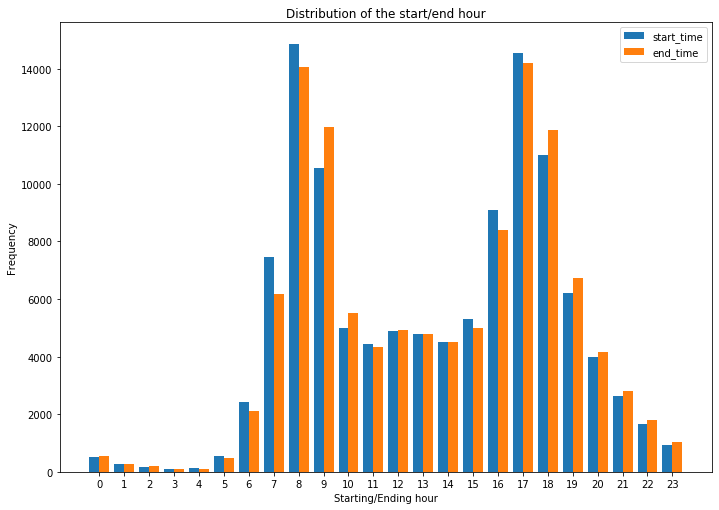

In [7]:
plt.figure(figsize = (11.69, 8.27))
plt.bar(bike["start_time"].dt.hour.value_counts().index, 
        height = bike["start_time"].dt.hour.value_counts(), 
        align = "edge",
        width = -0.4,
        label = "start_time")
plt.bar(bike["end_time"].dt.hour.value_counts().index, 
        height = bike["end_time"].dt.hour.value_counts(),
        align = "edge",
        width = 0.4,
        label = "end_time")

ticks = range(0,24)
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels);

plt.xlabel("Starting/Ending hour")
plt.ylabel("Frequency")
plt.title("Distribution of the start/end hour")
plt.legend();

## Distribution of member age
The distribution of the rider age is normal distibution but right skewed. The number of Males riders are much more than Females and the average age for rideres is around 33 years. The company can create more promotrion for women to ecourage them and for people more than 40 years.

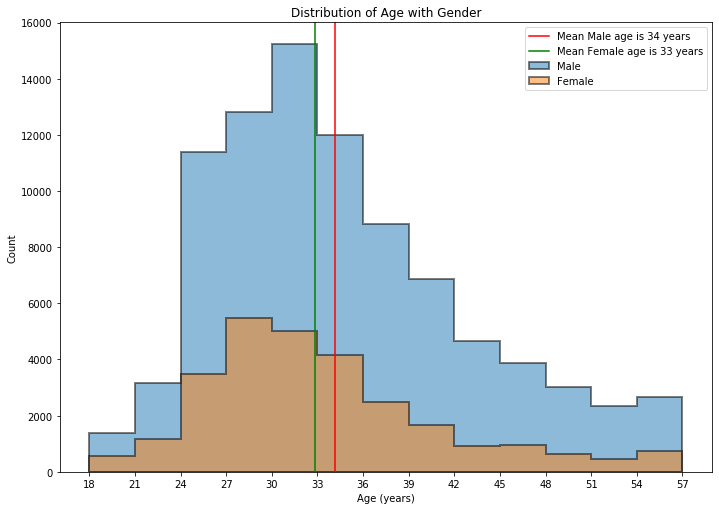

In [8]:
plt.figure(figsize = (11.69, 8.27))
step = 3
bins = np.arange(bike.age.min(), bike.age.max()+step, step)
kwargs = dict(histtype='stepfilled', alpha=0.5, edgecolor="black", linewidth=2)

plt.hist(data=bike[bike.member_gender == "Male"], x="age", 
         bins= bins, label = "Male", **kwargs);
plt.hist(data=bike[bike.member_gender == "Female"], x="age", 
         bins= bins, label = "Female", **kwargs);
#sb.displot(data=bike, x="age", bins= bins, hue = "member_gender", kde=True);
plt.axvline(x=bike.groupby("member_gender").age.mean().Male, 
            label = "Mean Male age is {:0.0f} years".format(bike.groupby("member_gender").age.mean().Male), 
            color = "red")
plt.axvline(x=bike.groupby("member_gender").age.mean().Female, 
            label = "Mean Female age is {:0.0f} years".format(bike.groupby("member_gender").age.mean().Female), 
            color = "green")
plt.legend(loc = 'upper right');
plt.xlabel("Age (years)");
plt.ylabel("Count");
plt.title("Distribution of Age with Gender")
plt.xticks(bins, bins);

## Relation between user type and the duration
Average duration of "Customer" is heigher than "Subscriber" and both are around 10min. We need to create promotion for "Customer" to be "Subscriber".

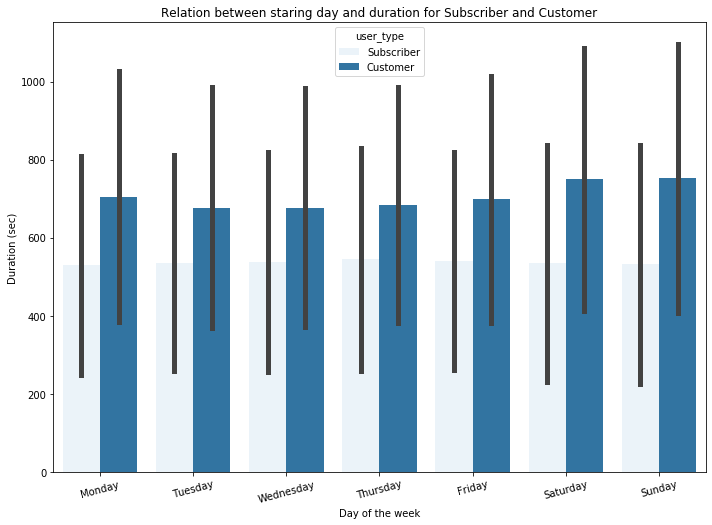

In [9]:
plt.figure(figsize = (11.69, 8.27))
base_color = sb.color_palette()[0]
sb.barplot(data=bike, x='start_day', y='duration_sec', hue="user_type", 
           color=base_color, 
           errwidth=5, 
           ci='sd')
plt.xticks(rotation=15);
plt.xlabel("Day of the week");
plt.ylabel("Duration (sec)");
plt.title("Relation between staring day and duration for Subscriber and Customer");

## The Distribution of user type and weekday
During the weekends the use of bike drop to less than half of working day. 
We need to create promotion to ecourage people them to ride during weekends.

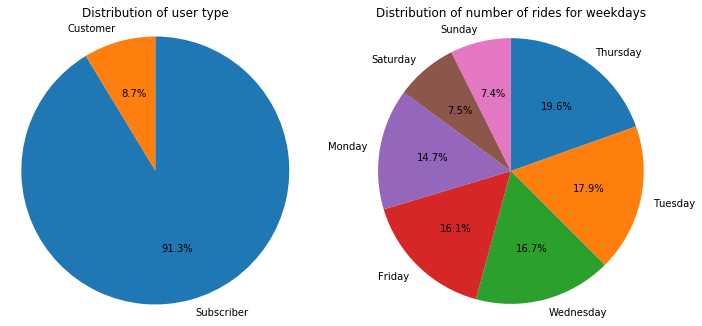

In [10]:
plt.figure(figsize = (11.69, 8.27))
###############################################################################
plt.subplot(1,2,1)
plt.pie(bike.user_type.value_counts(), 
        labels = bike.user_type.value_counts().index , 
        startangle = 90, 
        counterclock = False,
        autopct='%1.1f%%');
plt.axis('square');
plt.title("Distribution of user type");
###############################################################################
plt.subplot(1,2,2)
plt.pie(bike.start_day.value_counts(), 
        labels = bike.start_day.value_counts().index , 
        startangle = 90, 
        counterclock = False,
        autopct='%1.1f%%');
plt.axis('square');
plt.title("Distribution of number of rides for weekdays");

# <h1><center>Thank You</center></h1>